# Jaffle Shop Data Analysis - Final Project

## Instructions
You have been hired as a data analyst for Jaffle Shop, a growing chain of gourmet toasted sandwich restaurants. The executive team needs insights to make strategic business decisions.

Using the provided datasets and Python Polars, analyze the business performance and provide data-driven recommendations. You must use Polars for all data manipulation and analysis.

## Available Data
- `Customers.csv`: Customer information
- `Orders.csv`: Order transactions with totals and timestamps
- `Items.csv`: Individual items within each order
- `Products.csv`: Product catalog with prices and descriptions
- `Stores.csv`: Store locations and opening dates
- `Supplies.csv`: Supply costs for each product

## Setup and Data Loading

In [1]:
# Import necessary libraries
import polars as pl
from datetime import datetime, timedelta, date
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting style
plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
# Load all datasets
customers = pl.read_csv('https://raw.githubusercontent.com/Masters-in-Management-2023-2024/final-project-jaffle-shop-blue-2/refs/heads/main//data/Customers.csv')
orders = pl.read_csv('https://raw.githubusercontent.com/Masters-in-Management-2023-2024/final-project-jaffle-shop-blue-2/refs/heads/main/data/Orders.csv')
items = pl.read_csv('https://raw.githubusercontent.com/Masters-in-Management-2023-2024/final-project-jaffle-shop-blue-2/refs/heads/main/data/Items.csv')
products = pl.read_csv('https://raw.githubusercontent.com/Masters-in-Management-2023-2024/final-project-jaffle-shop-blue-2/refs/heads/main/data/Products.csv')
stores = pl.read_csv('https://raw.githubusercontent.com/Masters-in-Management-2023-2024/final-project-jaffle-shop-blue-2/refs/heads/main/data/Stores.csv')
supplies = pl.read_csv('https://raw.githubusercontent.com/Masters-in-Management-2023-2024/final-project-jaffle-shop-blue-2/refs/heads/main/data/Supplies.csv')

# Display basic information about each dataset
print("Dataset shapes:")
print(f"Customers: {customers.shape}")
print(f"Orders: {orders.shape}")
print(f"Items: {items.shape}")
print(f"Products: {products.shape}")
print(f"Stores: {stores.shape}")
print(f"Supplies: {supplies.shape}")

Dataset shapes:
Customers: (932, 2)
Orders: (63148, 7)
Items: (90184, 3)
Products: (10, 5)
Stores: (6, 4)
Supplies: (65, 5)


In [3]:
customers.head(10)

id,name
str,str
"""ae3a050d-287f-4257-a778-cdb420…","""Anthony Wells"""
"""33a51363-1989-4967-93a1-b8e225…","""Scott Thompson"""
"""2f8f7de0-4c62-4b87-8494-6a50d6…","""Michael Walker"""
"""46f7be1b-f2bc-4a91-a7c3-88c141…","""Alicia Clark"""
"""c616a2a2-5efc-4e22-9db1-50dfa4…","""Dawn Williams"""
"""eb6593b0-95ca-4ca5-9153-41f1f2…","""Connor Hernandez"""
"""b515e78b-ff05-45fb-b035-8c6476…","""Mark Smith"""
"""93423179-917e-4abd-96cf-1b60df…","""April Morris"""
"""aa410077-7868-4030-9a3b-7d0088…","""Eric Adams"""


In [4]:
orders.head(10)

id,customer,ordered_at,store_id,subtotal,tax_paid,order_total
str,str,str,str,i64,i64,i64
"""363ab5f2-78b4-4227-9333-9701ef…","""ae3a050d-287f-4257-a778-cdb420…","""2016-09-01T14:49:00""","""a9128331-08d7-41a2-b615-21283e…",1700,102,1802
"""d6cdb882-aa8c-4b5a-a478-4321ef…","""33a51363-1989-4967-93a1-b8e225…","""2016-09-01T08:21:00""","""a9128331-08d7-41a2-b615-21283e…",600,36,636
"""ca934a93-aca1-4aeb-9786-efb0da…","""2f8f7de0-4c62-4b87-8494-6a50d6…","""2016-09-01T08:59:00""","""a9128331-08d7-41a2-b615-21283e…",700,42,742
"""ecd64383-c4df-41aa-b270-f3b110…","""46f7be1b-f2bc-4a91-a7c3-88c141…","""2016-09-01T16:42:00""","""a9128331-08d7-41a2-b615-21283e…",500,30,530
"""adae1fcd-20b7-4f40-af1c-dc121d…","""c616a2a2-5efc-4e22-9db1-50dfa4…","""2016-09-01T09:07:00""","""a9128331-08d7-41a2-b615-21283e…",600,36,636
"""43565eda-548a-4d00-afae-c4b5d3…","""eb6593b0-95ca-4ca5-9153-41f1f2…","""2016-09-01T08:10:00""","""a9128331-08d7-41a2-b615-21283e…",600,36,636
"""0116c37e-224e-4bd6-9e94-6c0588…","""b515e78b-ff05-45fb-b035-8c6476…","""2016-09-01T11:39:00""","""a9128331-08d7-41a2-b615-21283e…",1300,78,1378
"""3f075493-a0a0-4d87-95f9-5e6f23…","""93423179-917e-4abd-96cf-1b60df…","""2016-09-01T08:26:00""","""a9128331-08d7-41a2-b615-21283e…",500,30,530
"""ca72c9ad-9474-49fa-95f4-4315df…","""aa410077-7868-4030-9a3b-7d0088…","""2016-09-01T07:28:00""","""a9128331-08d7-41a2-b615-21283e…",600,36,636


In [5]:
items.head(10)

id,order_id,sku
str,str,str
"""6136835c-cfa4-4308-bd65-440f7b…","""363ab5f2-78b4-4227-9333-9701ef…","""BEV-001"""
"""6136835c-cfa4-4308-bd65-440f7b…","""363ab5f2-78b4-4227-9333-9701ef…","""BEV-001"""
"""1a5fc7f0-1573-454a-ae79-576673…","""363ab5f2-78b4-4227-9333-9701ef…","""JAF-002"""
"""d32d93ca-250b-47b2-b640-cb482e…","""d6cdb882-aa8c-4b5a-a478-4321ef…","""BEV-001"""
"""8dabb27c-fcc2-4513-8adf-886cdc…","""ca934a93-aca1-4aeb-9786-efb0da…","""BEV-004"""
"""6849a62f-43ee-464c-8f1f-9d597f…","""ecd64383-c4df-41aa-b270-f3b110…","""BEV-002"""
"""ea2ea192-7d11-4252-bd53-821a70…","""adae1fcd-20b7-4f40-af1c-dc121d…","""BEV-003"""
"""c76056cb-bdd7-43b6-aa8d-3996ba…","""43565eda-548a-4d00-afae-c4b5d3…","""BEV-003"""
"""b243101b-a04c-4682-b03d-c6b8de…","""0116c37e-224e-4bd6-9e94-6c0588…","""BEV-001"""


In [6]:
products.head(10)

sku,name,type,price,description
str,str,str,i64,str
"""JAF-001""","""nutellaphone who dis?""","""jaffle""",1100,"""nutella and banana jaffle"""
"""JAF-002""","""doctor stew""","""jaffle""",1100,"""house-made beef stew jaffle"""
"""JAF-003""","""the krautback""","""jaffle""",1200,"""lamb and pork bratwurst with h…"
"""JAF-004""","""flame impala""","""jaffle""",1400,"""pulled pork and pineapple al p…"
"""JAF-005""","""mel-bun""","""jaffle""",1200,"""melon and minced beef bao, in …"
"""BEV-001""","""tangaroo""","""beverage""",600,"""mango and tangerine smoothie"""
"""BEV-002""","""chai and mighty""","""beverage""",500,"""oatmilk chai latte with protei…"
"""BEV-003""","""vanilla ice""","""beverage""",600,"""iced coffee with house-made fr…"
"""BEV-004""","""for richer or pourover ""","""beverage""",700,"""daily selection of single esta…"


In [7]:
stores.head(10)

id,name,opened_at,tax_rate
str,str,str,f64
"""a9128331-08d7-41a2-b615-21283e…","""Philadelphia""","""2016-09-01T00:00:00""",0.06
"""a2a24e87-dec8-4f5d-9c9e-0e9849…","""Brooklyn""","""2017-03-12T00:00:00""",0.04
"""e1a600e7-e70a-43a8-96fd-a6dd26…","""Chicago""","""2018-04-29T00:00:00""",0.0625
"""0d16236e-9a7f-4cd6-a9ec-24b16f…","""San Francisco""","""2018-05-09T00:00:00""",0.075
"""ca0b89cc-6d98-4b87-88e3-5a0d95…","""New Orleans""","""2019-03-10T00:00:00""",0.04
"""1abebe31-a2a6-4554-a235-03d342…","""Los Angeles""","""2019-09-13T00:00:00""",0.08


In [8]:
supplies.head(10)

id,name,cost,perishable,sku
str,str,i64,bool,str
"""SUP-001""","""compostable cutlery - knife""",7,false,"""JAF-001"""
"""SUP-002""","""cutlery - fork""",7,false,"""JAF-001"""
"""SUP-003""","""serving boat""",11,false,"""JAF-001"""
"""SUP-004""","""napkin""",4,false,"""JAF-001"""
"""SUP-009""","""bread""",33,true,"""JAF-001"""
"""SUP-011""","""nutella""",46,true,"""JAF-001"""
"""SUP-012""","""banana""",13,true,"""JAF-001"""
"""SUP-001""","""compostable cutlery - knife""",7,false,"""JAF-002"""
"""SUP-002""","""cutlery - fork""",7,false,"""JAF-002"""


## Question 1: Revenue Performance Analysis

The CFO wants to understand the company's financial performance across different dimensions. Analyze:
- What is the total revenue generated by Jaffle Shop? (Store result in variable: `total_revenue`)
- How does revenue vary by store location? (Store result in variable: `revenue_by_store`)
- What are the monthly revenue trends? (Store result in variable: `monthly_revenue_trends`)
- Which day of the week generates the most revenue? (Store result in variable: `revenue_by_day_of_week`)
- Include at least one chart for one of these questions

In [9]:
# Q1.1: Calculate total revenue
total_revenue = orders["order_total"].sum()
print(f"The total revenue generated by Jaffle Shop is ${total_revenue:,.2f}")

The total revenue generated by Jaffle Shop is $66,038,193.00


In [10]:
# Q1.2: Revenue by store location
revenue_by_store = (
    orders.group_by("store_id")
    .agg(pl.col("order_total").sum().alias("revenue"))
    .join(
        stores.rename({"id": "store_id", "name": "store_name"}).select(["store_id", "store_name"]),
        on="store_id",
        how="left"
    )
    .sort("revenue", descending=True)
)

print("Revenue by store is as follows: ", revenue_by_store)

Revenue by store is as follows:  shape: (2, 3)
┌─────────────────────────────────┬──────────┬──────────────┐
│ store_id                        ┆ revenue  ┆ store_name   │
│ ---                             ┆ ---      ┆ ---          │
│ str                             ┆ i64      ┆ str          │
╞═════════════════════════════════╪══════════╪══════════════╡
│ a9128331-08d7-41a2-b615-21283e… ┆ 43215565 ┆ Philadelphia │
│ a2a24e87-dec8-4f5d-9c9e-0e9849… ┆ 22822628 ┆ Brooklyn     │
└─────────────────────────────────┴──────────┴──────────────┘


In [11]:
# Q1.3: Monthly revenue trends
monthly_revenue_trends = (
    orders.with_columns(
        pl.col("ordered_at").str.to_datetime("%Y-%m-%dT%H:%M:%S").alias("order_date")
    )
    .with_columns(pl.col("order_date").dt.date().alias("order_date_only"))
    .with_columns(pl.col("order_date_only").dt.strftime("%Y-%m").alias("year_month"))
    .group_by("year_month")
    .agg(pl.col("order_total").sum().alias("monthly_revenue"))
    .sort("year_month")
)

print("Monthly Revenue Trends: ", monthly_revenue_trends)

Monthly Revenue Trends:  shape: (12, 2)
┌────────────┬─────────────────┐
│ year_month ┆ monthly_revenue │
│ ---        ┆ ---             │
│ str        ┆ i64             │
╞════════════╪═════════════════╡
│ 2016-09    ┆ 1644922         │
│ 2016-10    ┆ 1956651         │
│ 2016-11    ┆ 2552662         │
│ 2016-12    ┆ 3307337         │
│ 2017-01    ┆ 3821291         │
│ …          ┆ …               │
│ 2017-04    ┆ 7392014         │
│ 2017-05    ┆ 8469909         │
│ 2017-06    ┆ 8617148         │
│ 2017-07    ┆ 8585320         │
│ 2017-08    ┆ 9332296         │
└────────────┴─────────────────┘


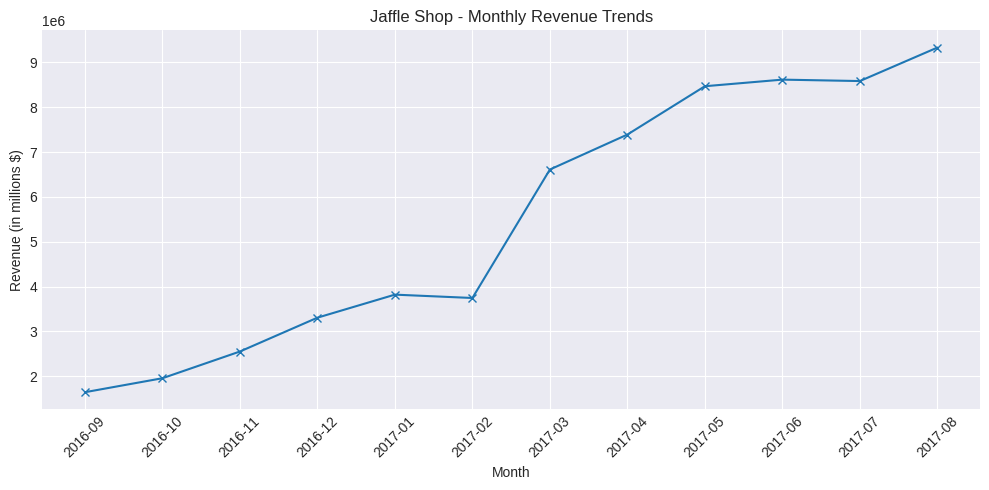

In [12]:
plt.figure(figsize=(10,5))
plt.plot(
    monthly_revenue_trends["year_month"].to_list(),
    monthly_revenue_trends["monthly_revenue"].to_list(),
    marker="x"
)
plt.title("Jaffle Shop - Monthly Revenue Trends")
plt.xlabel("Month")
plt.ylabel("Revenue (in millions $)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Q1.4: Revenue by day of week
revenue_by_day_of_week = (
    orders.with_columns(
        pl.col("ordered_at").str.to_datetime("%Y-%m-%dT%H:%M:%S").alias("order_date")
    )
    .with_columns(pl.col("order_date").dt.strftime("%A").alias("day_of_week"))
    .group_by("day_of_week")
    .agg(pl.col("order_total").sum().alias("revenue"))
)

print("The revenue by day of the week is as follows:", revenue_by_day_of_week)

The revenue by day of the week is as follows: shape: (7, 2)
┌─────────────┬──────────┐
│ day_of_week ┆ revenue  │
│ ---         ┆ ---      │
│ str         ┆ i64      │
╞═════════════╪══════════╡
│ Wednesday   ┆ 10834569 │
│ Monday      ┆ 10611971 │
│ Saturday    ┆ 5981489  │
│ Sunday      ┆ 6207799  │
│ Friday      ┆ 10758715 │
│ Tuesday     ┆ 10814455 │
│ Thursday    ┆ 10829195 │
└─────────────┴──────────┘


## Question 2: Product Performance

The Product Manager needs insights about the menu items:
- What is the revenue contribution of each product category (jaffles vs beverages)? (Store result in variable: `revenue_by_category`)
- What is the average price of products by type (jaffles vs beverages)?
- Include at least one chart to answer one of the above questions.

In [14]:
# Q2.1: Revenue by product category
items_products = items.join(
    products.select(["sku","type","price"]),
    on="sku",
    how="left"
)
items_products_orders = items_products.join(
    orders.select(["id"]),
    left_on="order_id",
    right_on="id",
    how="inner"
)
revenue_by_category = (
    items_products_orders.group_by("type")
    .agg(pl.col("price").sum().alias("revenue"))
    .sort("revenue", descending=True)
)
print("Revenue by category: ", revenue_by_category)

Revenue by category:  shape: (2, 2)
┌──────────┬──────────┐
│ type     ┆ revenue  │
│ ---      ┆ ---      │
│ str      ┆ i64      │
╞══════════╪══════════╡
│ beverage ┆ 39836200 │
│ jaffle   ┆ 22880900 │
└──────────┴──────────┘


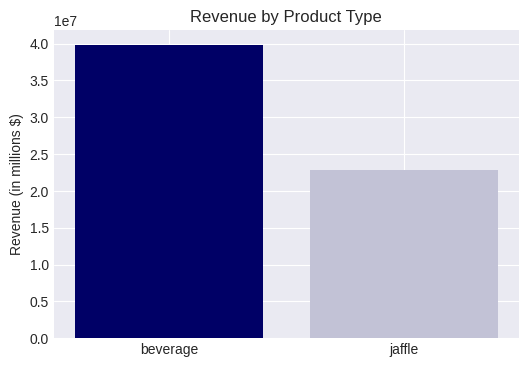

In [15]:
plt.figure(figsize=(6,4))
plt.bar(
    revenue_by_category["type"],
    revenue_by_category["revenue"],
    color=["#000066", "#c2c2d6"]
)
plt.ylabel("Revenue (in millions $)")
plt.title("Revenue by Product Type")
plt.show()

In [16]:
# Q2.2 Average price of products by type
avg_price_by_category = (
    products.group_by("type")
    .agg(pl.col("price").mean().alias("avg_price"))
)
print("The average price by category is as follows: ", avg_price_by_category)

The average price by category is as follows:  shape: (2, 2)
┌──────────┬───────────┐
│ type     ┆ avg_price │
│ ---      ┆ ---       │
│ str      ┆ f64       │
╞══════════╪═══════════╡
│ beverage ┆ 560.0     │
│ jaffle   ┆ 1200.0    │
└──────────┴───────────┘


## Question 3: Store Expansion Strategy

The Operations Director is planning expansion strategies:
- Which stores have the highest revenue per day since opening? (Store result in variable: `revenue_per_day_by_store`)
- What is the relationship between local tax rates and store performance? (Store result in variable: `tax_rate_performance`)
- Include at least one chart to answer one of the above questions.

In [17]:
# Q3.1: Revenue per day since opening by store

stores = stores.with_columns(
    pl.col("opened_at").str.strptime(pl.Date, "%Y-%m-%dT%H:%M:%S").alias("opened_date")
)

revenue_per_store = orders.group_by("store_id").agg(
    pl.col("order_total").sum().alias("total_revenue")
)


store_revenue = revenue_per_store.join(
    stores.select(["id","name","opened_date"]).rename({"id":"store_id","name":"store_name"}),
    on="store_id",
    how="left"
)

today = pl.lit(date.today())

revenue_per_day_by_store = store_revenue.with_columns(
    ((today.cast(pl.Int64) - pl.col("opened_date").cast(pl.Int64)).alias("days_open"))
).with_columns(
    (pl.col("total_revenue") / pl.col("days_open")).alias("revenue_per_day")
).sort("revenue_per_day", descending=True)

revenue_per_day_by_store.select(["store_name","revenue_per_day"])

store_name,revenue_per_day
str,f64
"""Philadelphia""",13187.538908
"""Brooklyn""",7397.934522


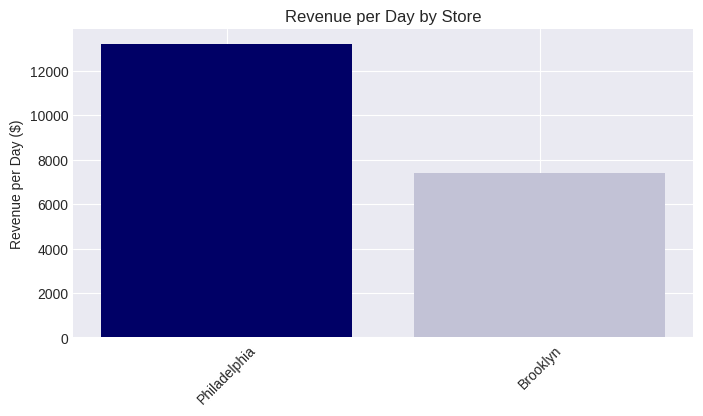

In [18]:
plt.figure(figsize=(8,4))
plt.bar(
    revenue_per_day_by_store["store_name"],
    revenue_per_day_by_store["revenue_per_day"],
    color=["#000066", "#c2c2d6"]
)
plt.xticks(rotation=45)
plt.ylabel("Revenue per Day ($)")
plt.title("Revenue per Day by Store")
plt.show()

In [19]:
# Q3.2: Tax rates vs store performance
tax_rate_performance = revenue_per_day_by_store.join(
    stores.select(["id","tax_rate"]).rename({"id":"store_id"}),
    on="store_id",
    how="left"
).select(["store_name","tax_rate","revenue_per_day"]).sort("revenue_per_day", descending=True)

tax_rate_performance

store_name,tax_rate,revenue_per_day
str,f64,f64
"""Philadelphia""",0.06,13187.538908
"""Brooklyn""",0.04,7397.934522


## Question 4: Customer Behavior Analysis

The Marketing Manager wants to understand customer patterns:
- What is the distribution of order values? (Store result in variable: `order_value_distribution`)
- How many customers are repeat customers? (Store result in variable: `repeat_customer_analysis`)
- Which customers contribute the most to revenue? (Store result in variable: `top_revenue_customers`)

In [20]:
# Q4.1: Distribution of order values
order_value_distribution = (
    orders
    .select(pl.col("order_total"))
    .describe()
)
print(order_value_distribution)

shape: (9, 2)
┌────────────┬─────────────┐
│ statistic  ┆ order_total │
│ ---        ┆ ---         │
│ str        ┆ f64         │
╞════════════╪═════════════╡
│ count      ┆ 63148.0     │
│ null_count ┆ 0.0         │
│ mean       ┆ 1045.76856  │
│ std        ┆ 1025.930713 │
│ min        ┆ 0.0         │
│ 25%        ┆ 530.0       │
│ 50%        ┆ 636.0       │
│ 75%        ┆ 1165.0      │
│ max        ┆ 10281.0     │
└────────────┴─────────────┘


In [21]:
# Q4.2: Repeat customers analysis
repeat_customer_analysis = (
    orders
    .group_by("customer")
    .agg(pl.count("id").alias("order_count"))
    .with_columns((pl.col("order_count") > 1).alias("is_repeat"))
    .group_by("is_repeat")
    .agg(pl.count("customer").alias("num_customers"))
)
print(repeat_customer_analysis)

shape: (2, 2)
┌───────────┬───────────────┐
│ is_repeat ┆ num_customers │
│ ---       ┆ ---           │
│ bool      ┆ u32           │
╞═══════════╪═══════════════╡
│ true      ┆ 920           │
│ false     ┆ 10            │
└───────────┴───────────────┘


In [22]:
# Q4.3: Top revenue contributors
top_revenue_customers = (
    orders
    .group_by("customer")
    .agg(pl.col("order_total").sum().alias("total_revenue"))
    .join(customers, left_on="customer", right_on="id", how="left")
    .sort("total_revenue", descending=True)
    .head(10)
)
print("Our top 10 sources of revenue and their respective name", top_revenue_customers.select("total_revenue", "name"))

Our top 10 sources of revenue and their respective name shape: (10, 2)
┌───────────────┬──────────────────────┐
│ total_revenue ┆ name                 │
│ ---           ┆ ---                  │
│ i64           ┆ str                  │
╞═══════════════╪══════════════════════╡
│ 262647        ┆ David Leonard        │
│ 259037        ┆ Jesse Moore          │
│ 258515        ┆ Diane Davis          │
│ 252703        ┆ Holly Johnson        │
│ 249821        ┆ Gregory Hayes        │
│ 247510        ┆ Julie Robinson       │
│ 246325        ┆ Christopher Robinson │
│ 244102        ┆ Douglas Burgess      │
│ 239641        ┆ Jacob Brown          │
│ 237098        ┆ Jenny Harrell        │
└───────────────┴──────────────────────┘


## Question 5: Profitability Deep Dive

The CEO needs a comprehensive profitability analysis:
- Calculate the gross margin for each product (consider supply costs) (Store result in variable: `product_margins`)
- Which products have the highest profit margins? (Store result in variable: `highest_margin_products`)
- What is the relationship between order size and profitability? (Store result in variable: `order_size_profitability`)
- How does profitability vary across different stores? (Store result in variable: `store_profitability`)

In [23]:
# Q5.1: Calculate gross margin per product
product_costs = (
    supplies
    .group_by("sku")
    .agg(pl.sum("cost").alias("total_cost"))
)

product_margins = (
    products
    .join(product_costs, on="sku", how="left")
    .with_columns(
        (pl.col("price") - pl.col("total_cost")).alias("profit_per_unit"),
        ((pl.col("price") - pl.col("total_cost")) / pl.col("price")).alias("gross_margin")
    )
)

print("Jaffle products margins:", product_margins)

Jaffle products margins: shape: (10, 8)
┌─────────┬──────────────┬──────────┬───────┬─────────────┬────────────┬─────────────┬─────────────┐
│ sku     ┆ name         ┆ type     ┆ price ┆ description ┆ total_cost ┆ profit_per_ ┆ gross_margi │
│ ---     ┆ ---          ┆ ---      ┆ ---   ┆ ---         ┆ ---        ┆ unit        ┆ n           │
│ str     ┆ str          ┆ str      ┆ i64   ┆ str         ┆ i64        ┆ ---         ┆ ---         │
│         ┆              ┆          ┆       ┆             ┆            ┆ i64         ┆ f64         │
╞═════════╪══════════════╪══════════╪═══════╪═════════════╪════════════╪═════════════╪═════════════╡
│ JAF-001 ┆ nutellaphone ┆ jaffle   ┆ 1100  ┆ nutella and ┆ 121        ┆ 979         ┆ 0.89        │
│         ┆ who dis?     ┆          ┆       ┆ banana      ┆            ┆             ┆             │
│         ┆              ┆          ┆       ┆ jaffle      ┆            ┆             ┆             │
│ JAF-002 ┆ doctor stew  ┆ jaffle   ┆ 1100  ┆ house

In [24]:
# Q5.2: Products with highest profit margins
highest_margin_products = (
    product_margins
    .sort("gross_margin", descending=True)
    .select(["sku", "name", "type", "price", "total_cost", "profit_per_unit", "gross_margin"])
    .head(5)
)
print("Top 5 Products with highest margins:", highest_margin_products)

Top 5 Products with highest margins: shape: (5, 7)
┌─────────┬───────────────────────┬──────────┬───────┬────────────┬─────────────────┬──────────────┐
│ sku     ┆ name                  ┆ type     ┆ price ┆ total_cost ┆ profit_per_unit ┆ gross_margin │
│ ---     ┆ ---                   ┆ ---      ┆ ---   ┆ ---        ┆ ---             ┆ ---          │
│ str     ┆ str                   ┆ str      ┆ i64   ┆ i64        ┆ i64             ┆ f64          │
╞═════════╪═══════════════════════╪══════════╪═══════╪════════════╪═════════════════╪══════════════╡
│ JAF-001 ┆ nutellaphone who dis? ┆ jaffle   ┆ 1100  ┆ 121        ┆ 979             ┆ 0.89         │
│ BEV-004 ┆ for richer or         ┆ beverage ┆ 700   ┆ 82         ┆ 618             ┆ 0.882857     │
│         ┆ pourover              ┆          ┆       ┆            ┆                 ┆              │
│ BEV-001 ┆ tangaroo              ┆ beverage ┆ 600   ┆ 82         ┆ 518             ┆ 0.863333     │
│ BEV-005 ┆ adele-ade             ┆ beve

In [25]:
# Q5.3: Order size vs profitability
items_with_price_cost = (
    items
    .join(products, on="sku", how="left")
    .join(product_costs, on="sku", how="left")
    .with_columns(
        (pl.col("price") - pl.col("total_cost")).alias("profit_per_item")
    )
)

order_size_profitability = (
    items_with_price_cost
    .group_by("order_id")
    .agg([
        pl.count("sku").alias("order_size"),
        pl.sum("price").alias("order_revenue"),
        pl.sum("profit_per_item").alias("order_profit")
    ])
    .join(orders.select(["id", "store_id"]), left_on="order_id", right_on="id", how="left")
)

print("Table showing order size, order revenue and order_profit:", order_size_profitability)

Table showing order size, order revenue and order_profit: shape: (62_642, 5)
┌───────────────────────────┬────────────┬───────────────┬──────────────┬──────────────────────────┐
│ order_id                  ┆ order_size ┆ order_revenue ┆ order_profit ┆ store_id                 │
│ ---                       ┆ ---        ┆ ---           ┆ ---          ┆ ---                      │
│ str                       ┆ u32        ┆ i64           ┆ i64          ┆ str                      │
╞═══════════════════════════╪════════════╪═══════════════╪══════════════╪══════════════════════════╡
│ 2d1ccbca-31b6-4fff-ae9e-c ┆ 1          ┆ 400           ┆ 337          ┆ a2a24e87-dec8-4f5d-9c9e- │
│ 0d0f5…                    ┆            ┆               ┆              ┆ 0e9849…                  │
│ 653395a2-cbe0-4758-91d2-7 ┆ 1          ┆ 1100          ┆ 849          ┆ a9128331-08d7-41a2-b615- │
│ 4d10c…                    ┆            ┆               ┆              ┆ 21283e…                  │
│ 3e688182-49e

In [26]:
# Q5.4: Profitability by store
store_profitability = (
    order_size_profitability
    .group_by("store_id")
    .agg([
        pl.mean("order_profit").alias("avg_profit_per_order"),
        pl.sum("order_profit").alias("total_profit"),
        pl.mean("order_size").alias("avg_order_size"),
        pl.count("order_id").alias("num_orders")
    ])
    .join(stores.select(["id", "name"]), left_on="store_id", right_on="id", how="left")
    .select(["name", "num_orders", "avg_order_size", "avg_profit_per_order", "total_profit"])
    .sort("total_profit", descending=True)
)

print("Profit by store analysis:", store_profitability)

Profit by store analysis: shape: (2, 5)
┌──────────────┬────────────┬────────────────┬──────────────────────┬──────────────┐
│ name         ┆ num_orders ┆ avg_order_size ┆ avg_profit_per_order ┆ total_profit │
│ ---          ┆ ---        ┆ ---            ┆ ---                  ┆ ---          │
│ str          ┆ u32        ┆ f64            ┆ f64                  ┆ i64          │
╞══════════════╪════════════╪════════════════╪══════════════════════╪══════════════╡
│ Philadelphia ┆ 40492      ┆ 1.441593       ┆ 799.122296           ┆ 32358060     │
│ Brooklyn     ┆ 22150      ┆ 1.436163       ┆ 785.934131           ┆ 17408441     │
└──────────────┴────────────┴────────────────┴──────────────────────┴──────────────┘


## Question 6: Business Optimization Recommendations

Based on your analysis, provide three specific, data-driven recommendations to improve business performance. Support each recommendation with relevant metrics and visualizations.

### Recommendation 1:
Start operating in more than 2 stores.

In [27]:
# Supporting analysis for Recommendation 1
print(
    "The number of stores we have is", stores['name'].n_unique(),
    "they are:", stores['name'].to_list(),
    "but only", revenue_by_store["store_name"].n_unique(),
    "stores show in orders and are creating profit:", revenue_by_store['store_name'].to_list()
)


The number of stores we have is 6 they are: ['Philadelphia', 'Brooklyn', 'Chicago', 'San Francisco', 'New Orleans', 'Los Angeles'] but only 2 stores show in orders and are creating profit: ['Philadelphia', 'Brooklyn']


### Recommendation 2:
Introduce weekend-focused promotions such as discounts, special jaffle combos, and events to drive traffic and increase weekend revenue.

/tmp/ipython-input-4175532582.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=days, y=revenue, palette=colors)


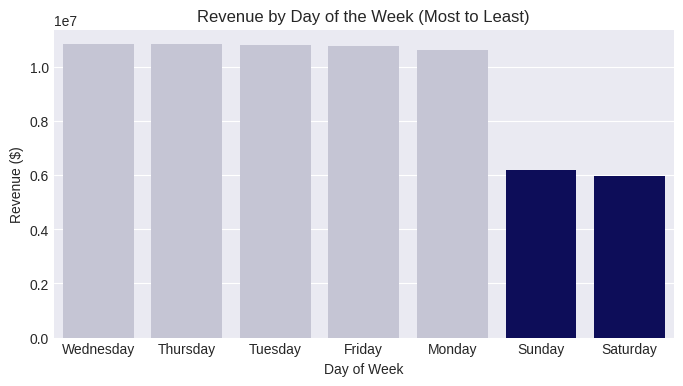

In [28]:
# Supporting analysis for Recommendation 2

sorted_revenue = revenue_by_day_of_week.sort("revenue", descending=True)

days = sorted_revenue['day_of_week'].to_list()
revenue = sorted_revenue['revenue'].to_list()

colors = ['#000066' if day in ['Saturday', 'Sunday'] else '#c2c2d6' for day in days]

plt.figure(figsize=(8,4))
sns.barplot(x=days, y=revenue, palette=colors)
plt.title("Revenue by Day of the Week (Most to Least)")
plt.ylabel("Revenue ($)")
plt.xlabel("Day of Week")
plt.show()

### Recommendation 3:
Introduce bundle promotions or “meal deals”. For example, “Buy 2 jaffles + 1 beverage at a discount”, to encourage customers to increase their order size. This would leverage the proven positive relationship between order size and profitability, boosting overall margins.

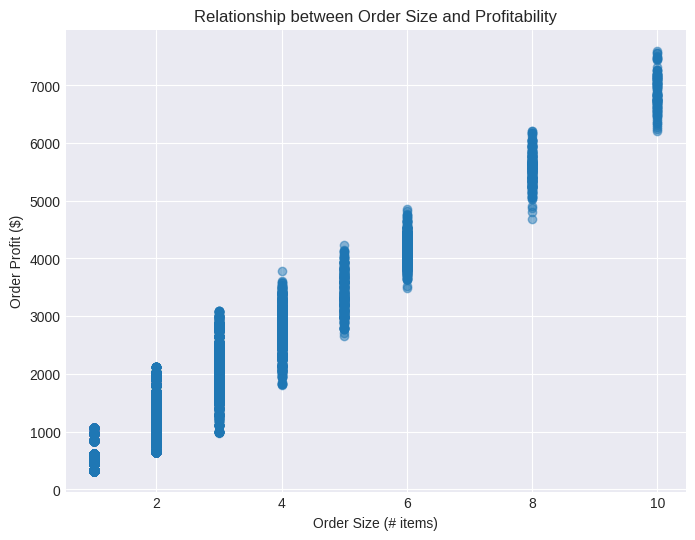

In [29]:
# Supporting analysis for Recommendation 3
plt.figure(figsize=(8,6))
plt.scatter(
    order_size_profitability["order_size"].to_list(),
    order_size_profitability["order_profit"].to_list(),
    alpha=0.5
)
plt.xlabel("Order Size (# items)")
plt.ylabel("Order Profit ($)")
plt.title("Relationship between Order Size and Profitability")
plt.show()

## Executive Summary

From our analysis of The Jaffle Shop's six data sets we determined several insights into the company's operational and financial performance. This allowed us to define some areas for strategic improvement.  

The Philadelphia (USD43,215,565) and Brooklyn (USD22,822,628) locations accounted for all the company's total revenue (USD66,038,193). Meaning the company has four locations (Chicago, San Francisco, New Orleans, and Los Angeles) that are generating no revenue – suggesting they are likely non-operational. The company has seen strong monthly growth from September 2016 to August 2017. However, weekend revenue for the company is significantly lower than weekday earnings. Additionally, beverages contribute more than 17 million dollars more than the sandwiches themselves despite having higher profit margins. Importantly, 920 of the company's 930 total customers are repeat buyers meaning a heavy emphasis on customer service should be of utmost importance.  

To continue growth Jaffle Shop should introduce weekend promotions to drive regular customers back into the shop. They should prioritize customer service in the two locations that are open. Opening the four dormant locations would significantly boost revenue. We suggest adding “Meal Deals” as an option for customers to help increase the size of customer's orders. “Buy 2 Jaffles and get 1 beverage at discount” would help increase revenue for the Jaffles – the most profitable items on the menu.  

### Key Findings:
1. Only 2 unique stores in orders: Brooklyn and Philadelphia.
2. Revenue on Saturday and Sunday is much lower than on weekdays, despite being potential high-traffic days.
3. The scatter plot shows a clear upward trend — orders with a higher number of items generate significantly higher profit. However, most orders cluster at small sizes (2–4 items).

### Strategic Recommendations:
1. Start operating in San Francisco, Los Angeles, Chicago and New Orleans.
2. Introduce weekend-focused promotions such as discounts, special jaffle combos, and events to drive traffic and increase weekend revenue.
3. Introduce bundle promotions or “meal deals”. For example “Buy 2 jaffles + 1 beverage at a discount” to encourage customers to increase their order size. This would leverage the proven positive relationship between order size and profitability, boosting overall margins.